## Objetivo da Análise Exploratória (EDA)

O objetivo desta etapa é compreender o comportamento dos clientes e identificar padrões associados ao **churn** (evasão de clientes)

In [2]:
import kaggle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from pathlib import Path

In [3]:
DATA_DIR = (Path.cwd().parent / "data")
DATA_DIR.mkdir(parents=True, exist_ok=True)
kaggle.api.authenticate()
kaggle.api.dataset_download_files("radheshyamkollipara/bank-customer-churn", path=DATA_DIR, unzip=True)
df = pd.read_csv(DATA_DIR/'Customer-Churn-Records.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Removendo colunas não importantes

In [4]:
df = df.drop(columns=["RowNumber","CustomerId","Surname"]) 

Verificando se existem registros nulos ou duplicados

In [6]:
df.info() 
print(f'\n{df.duplicated().sum()} linhas duplicadas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

Descrição estatistica das colunas númericas

In [ ]:
df.describe().transpose()

0 linhas duplicadas


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


Observando a correlação entre as colunas númericas do dataset

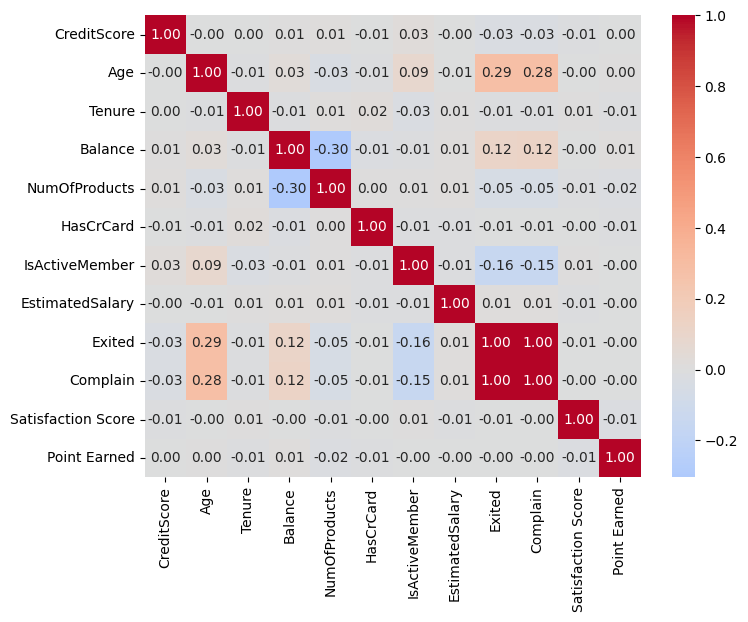

In [128]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(numeric_only=True), cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.show()

Coluna Complain possui uma correlação muita alta com Exited, a coluna que informe se houve ou não Churn,
portanto, complain será removido do dataset para que, posteriormente, o modelo seja capaz de identificar quais outras colunas influênciam o Churn.
Além de conceitualmente, se tratar de uma coluna "está no futuro" 

In [129]:
df = df.drop(columns='Complain')

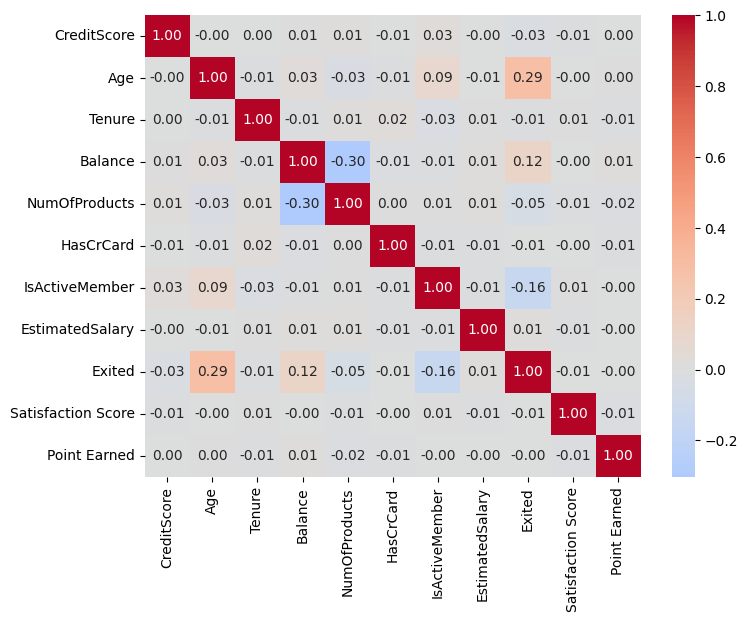

In [130]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(numeric_only=True), cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.show()

## Análise Univariada das variaveis

Nesta seção, analisamos a distribuição individual de cada variavel para:
- Identificar assimetrias
- Detectar possíveis outliers
- Compreender o comportamento geral dos clientes

CreditScore: 15 outliers
Balance: 0 outliers
Age: 359 outliers
EstimatedSalary: 0 outliers
Point Earned: 0 outliers
Tenure: 0 outliers


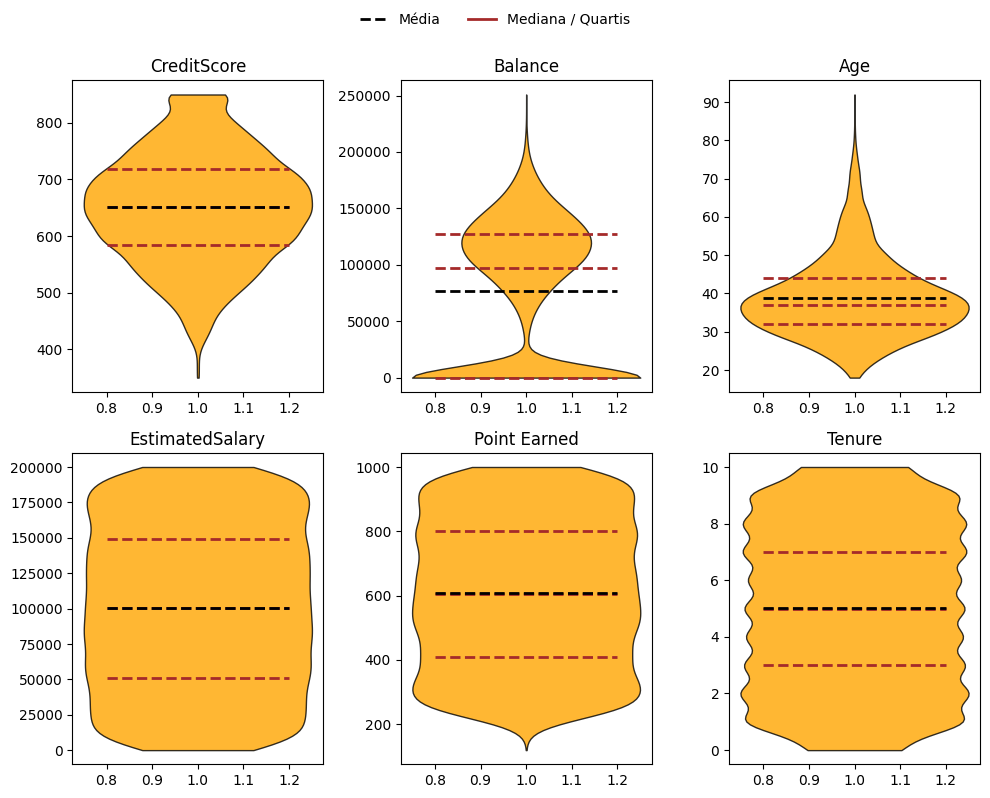

In [132]:
varbox = ['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Point Earned','Tenure']

for col in varbox:
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3-q1

    upper = q3 + iqr*1.5
    lower = q1 - iqr*1.5
    
    outliers = df[(df[col] < lower) | (df[col] > upper)].copy()
    outliers['OutlierColumn'] = col
    print(f"{col}: {outliers.shape[0]} outliers")

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(varbox):
    ax = axes[i]
    ax.set_title(varbox[i])
    
    violinos = ax.violinplot(df[col], showextrema=False)

    for violino in violinos['bodies']:
        violino.set_facecolor('orange')
        violino.set_edgecolor('black')
        violino.set_alpha(0.8)
    q1, med, q3 = df[col].quantile(0.25), df[col].quantile(0.50), df[col].quantile(0.75)

    ax.hlines([q1, med, q3], xmin=0.8, xmax=1.2, linestyle='--', colors='brown', linewidth=2)
    ax.hlines(df[col].mean(), xmin=0.8, xmax=1.2, linestyle='--', colors='black', linewidth=2)

for ax in axes[len(varbox):]:
    ax.set_visible(False)

legend_elements = [
    Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Média'),
    Line2D([0], [0], color='brown', linewidth=2, label='Mediana / Quartis')
]

fig.legend(handles=legend_elements, loc='upper center', ncol=3, frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Apesar de ter sido identificado 15 Credit Score outliers e 359 idades outliers, não faz sentido removelas ou aplicar algum tipo de tratamento, visto que

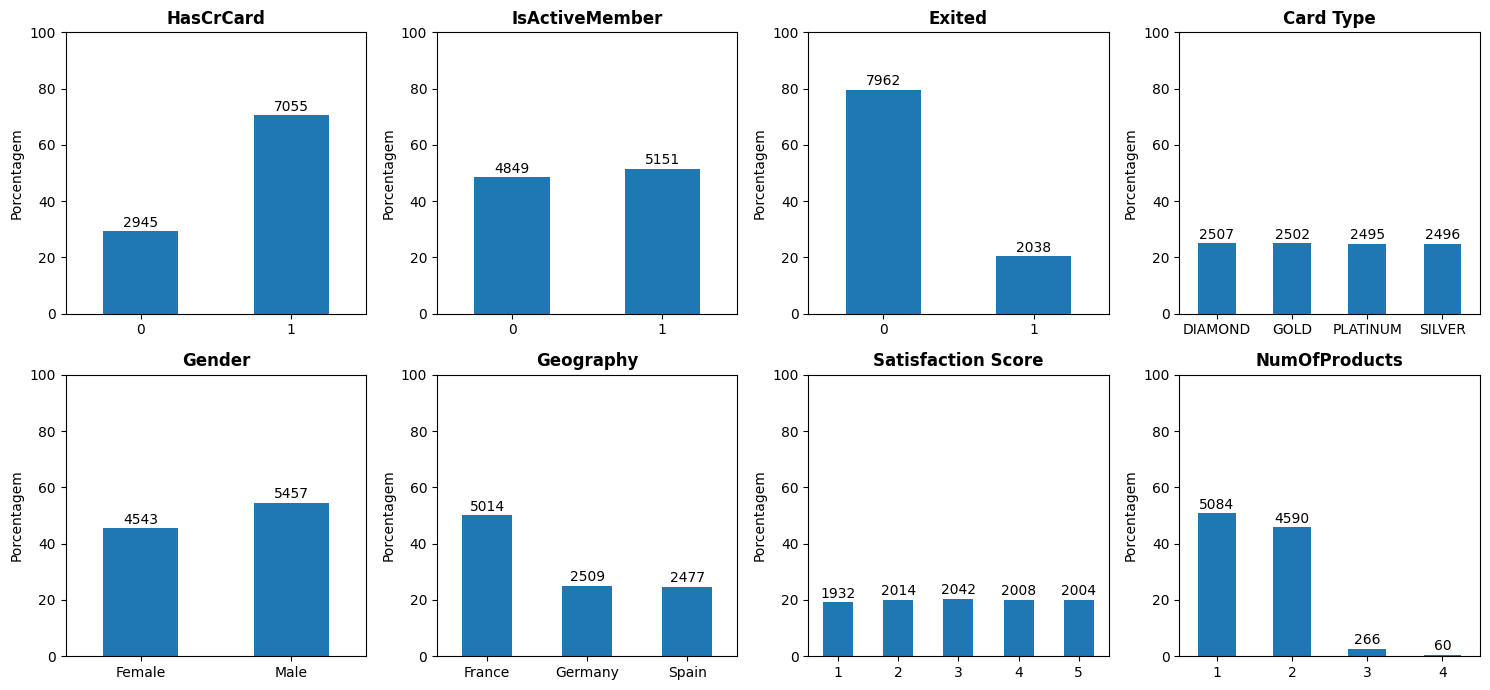

In [133]:
varbar = ['HasCrCard', 'IsActiveMember', 'Exited', 'Card Type','Gender',"Geography",'Satisfaction Score', 'NumOfProducts']

fig,axes = plt.subplots(2,4, figsize = (15,7))
axes = axes.flatten()

for i, col in enumerate(varbar):
    ax=axes[i]

    perc = df[col].value_counts(normalize=True).sort_index().mul(100)
    vol = df[col].value_counts().sort_index()

    perc.plot(kind='bar',ax=ax) 
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel('')
    ax.tick_params(axis='x',rotation=0)
    ax.set_ylim(0, 100)
    ax.set_ylabel('Porcentagem')
    
    for j, bar in enumerate(ax.patches):
        height = bar.get_height()
        ax.annotate(f'{vol.iloc[j]}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', fontsize=10)
        
for ax in axes[len(varbar):]:
    ax.set_visible(False)
    
plt.tight_layout()
plt.show()

In [134]:
varbar.remove('Exited')

## Variáveis vs Churn

Aqui avaliamos como a taxa de churn varia em função das variáveis, utilizando binning e agregações.

Essa abordagem ajuda a:
- Identificar faixas de maior risco
- permitir identificar segmentos críticos que merecem atenção estratégica.

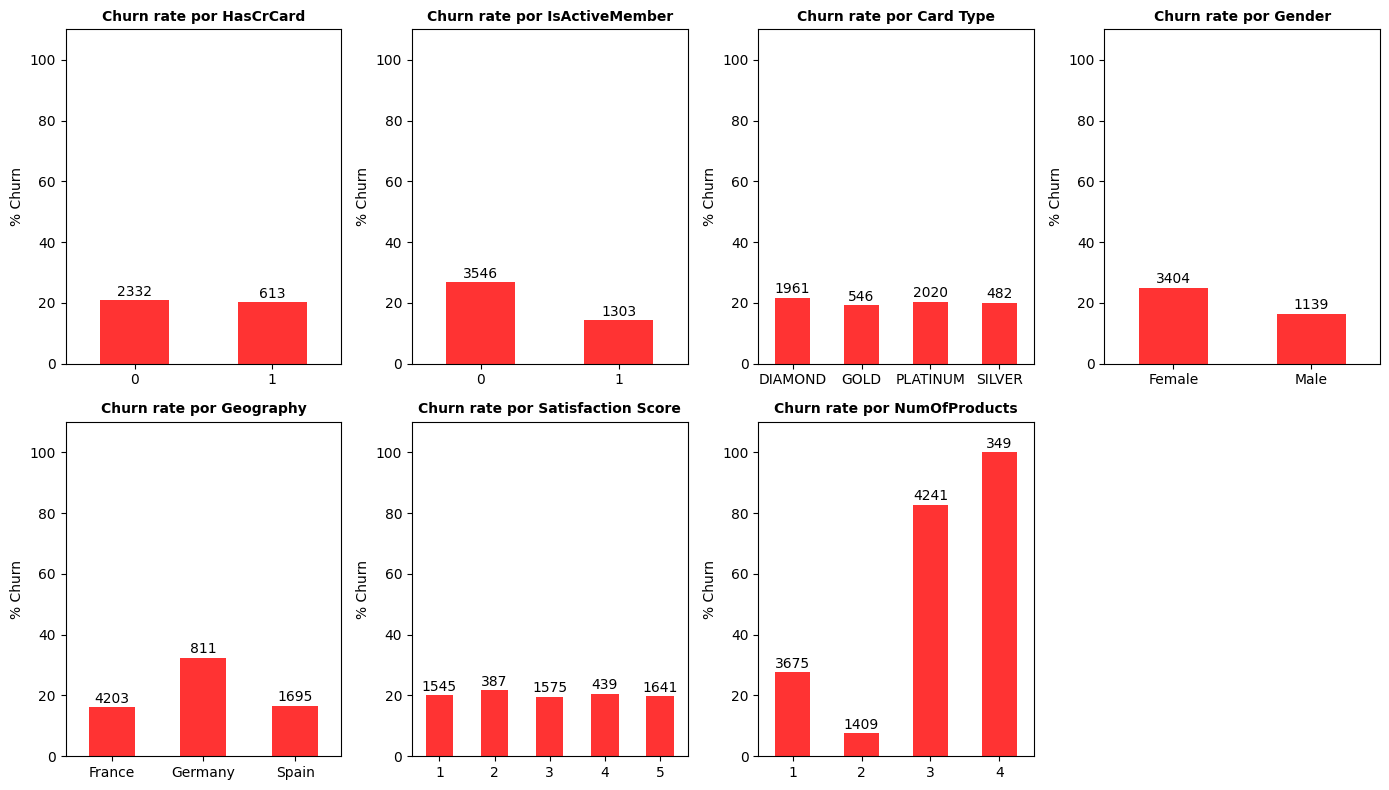

In [135]:
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(varbar):
    ax = axes[i]

    perc = df.groupby(col)['Exited'].mean().mul(100)
    vol = df.groupby(col)['Exited'].value_counts().sort_index()
    perc.plot(kind='bar', ax=ax, color='red', alpha=0.8)

    for j, bar in enumerate(ax.patches):
        height = bar.get_height()
        ax.annotate(f'{vol.iloc[j]}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', fontsize=10)

    ax.set_title(f'Churn rate por {col}', fontsize=10, fontweight='bold')
    ax.set_ylabel('% Churn')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=0)
    ax.set_ylim(0,110)

for ax in axes[len(varbar):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

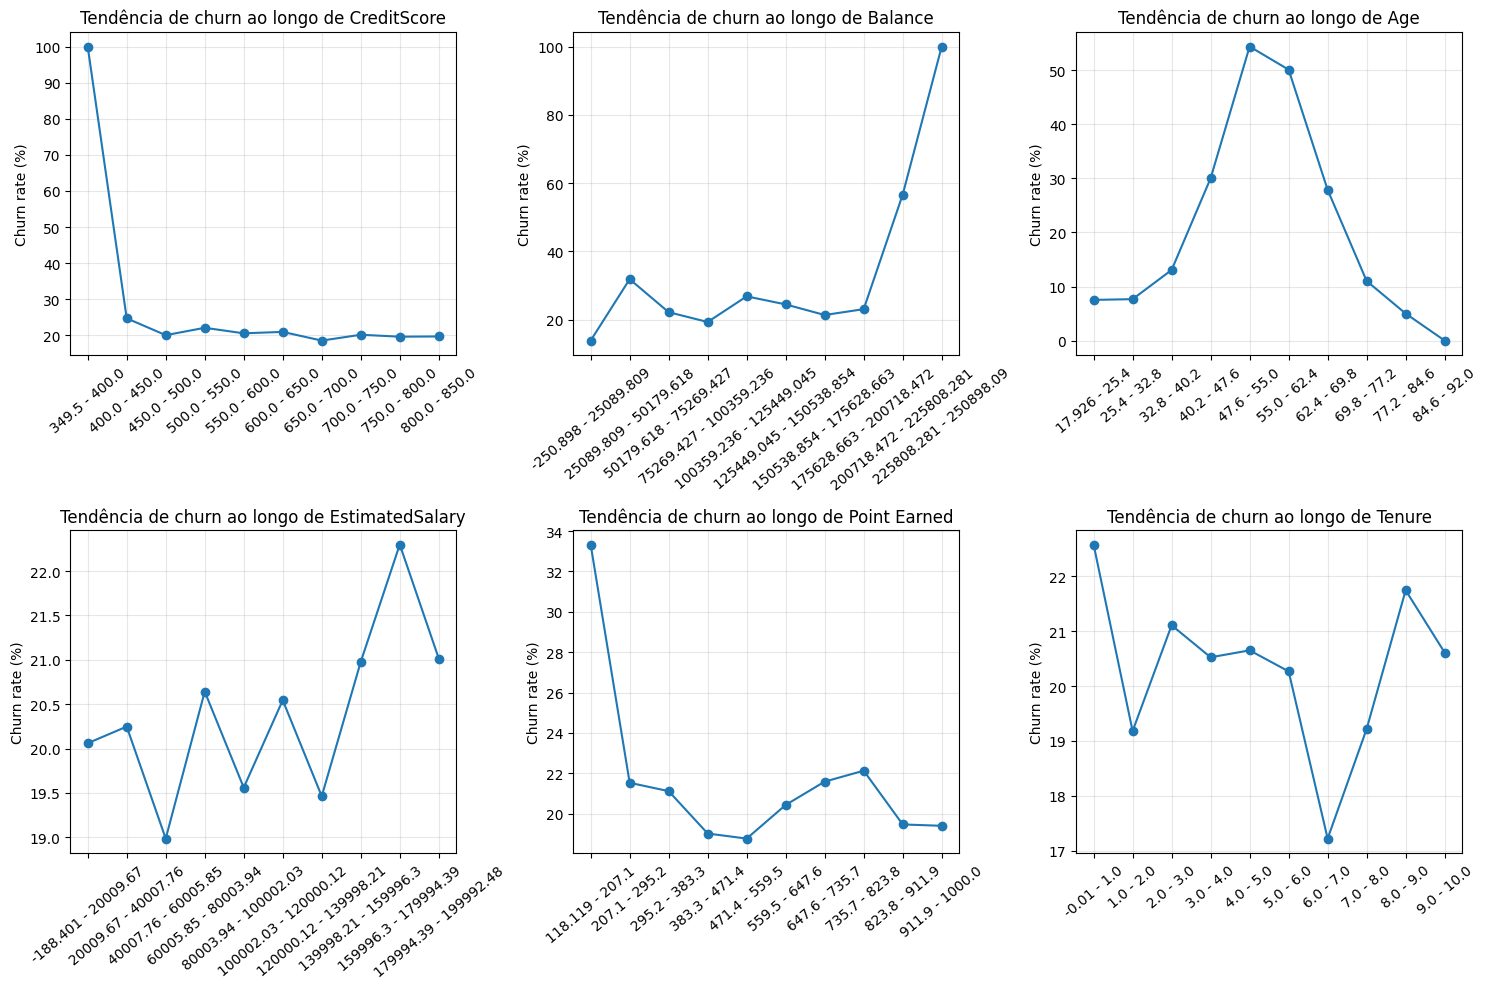

In [136]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(varbox):
    ax = axes[i]

    df[f'{col}_bin'] = pd.cut(df[col], bins=10)

    data_bin = df.groupby(f'{col}_bin', observed=True).agg(churn_rate=('Exited', 'mean'), volume=('Exited', 'count')).reset_index()    
    data_bin['churn_rate'] *=100
    data_bin[f'{col}_bin'] = data_bin[f'{col}_bin'].apply(lambda x: f'{(x.left)} - {(x.right)}')

    ax.plot(data_bin[f'{col}_bin'].astype(str), data_bin['churn_rate'], marker='o')
    ax.set_title(f'Tendência de churn ao longo de {col}')
    ax.set_ylabel('Churn rate (%)')
    ax.tick_params(axis='x', rotation=40)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


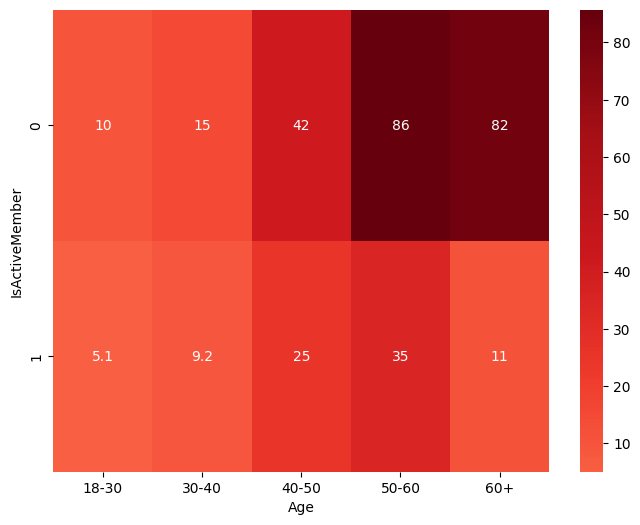

In [9]:
plt.figure(figsize=(8,6))
label = ['18-30','30-40','40-50','50-60','60+']
bin = [18,30,40,50,60,100]
age_faixa = pd.cut(df['Age'],bins=bin,labels=label,right=True,include_lowest=True) 

activechurnbyage = pd.pivot_table(
    df,
    values="Exited",
    index="IsActiveMember",
    columns=age_faixa,
    aggfunc="mean",
    observed=True
).mul(100)

sns.heatmap(activechurnbyage,annot=True,cmap='Reds',center=0)
plt.show()

## INSIGHTS

Faixa de Idade dos 40-69 possui forte relação com Churn

Clientes com baixo Credit Score e baixo Point Earned apresentam maior propensão ao churn, sugerindo perfil de maior risco financeiro e menor engajamento

A partir de 175600 de Balance a probabilidade de Churn começa a crescer exponencialmente

Clientes que compram 3 ou 4 produtos possuem, respectivamente, aproximadamente 80% e 100% de taxa de churn, ainda que a grande minoria dos clientes comprem 3 ou 4 vezes

Clientes não ativos a partir dos 40 anos possuem grande probabilidade de dar Churn